<a href="https://colab.research.google.com/github/rahulvenkat207/Qwen2_VL/blob/main/OCR-VQA/Qwen2_VL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-_fw8sbt8
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-_fw8sbt8
  Resolved https://github.com/huggingface/transformers to commit e50bf61decf741c6d59e4ba633b7392712673bda
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 40.5 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.46.0.dev0-py3-none-any.whl size=10025577 sha256=075b8b016c2cd6fc2ff61cf2045fc8f68f3086f9a0829d0109d71f6bf4bd155b
  Stored in directory: /tmp/pip-ephem-wheel-cache-qzfrx_da/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully 

# Qwen2-VL

Vision-language model series based on Qwen2

In [2]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer,AutoProcessor

In [3]:

model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    torch_dtype="auto",
    device_map="auto",
)

processor = AutoProcessor.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct"
)

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [4]:
from PIL import Image
import requests

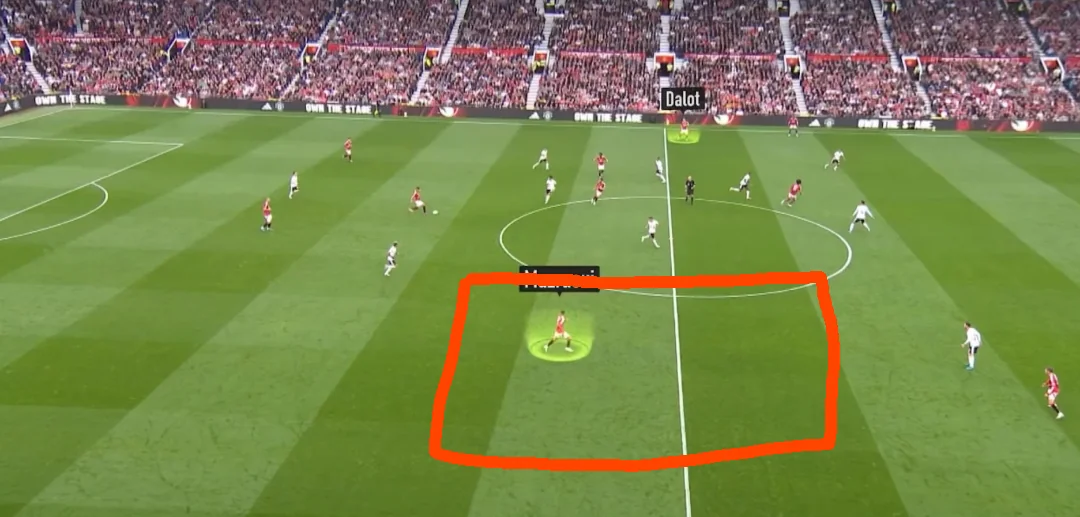

In [13]:

from IPython.display import Image, display

display(Image(image_path))

In [5]:

image = Image.open("pool.jpg")

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
            },
            {
                "type": "text",
                "text": "What is wrong with the tactics in the image? Your analysis should help the coach.."
            }
        ]
    }
]


In [8]:
text_prompt = processor.apply_chat_template(messages, add_generation_prompt=True)

inputs = processor(
    text = [text_prompt],
    images = [image],
    padding = True,
    return_tensors = "pt"
)
inputs = inputs.to("cuda")
output_ids = model.generate(**inputs, max_new_tokens=1024)

In [9]:
generated_ids = [
    output_ids[len(input_ids) :]
    for input_ids, output_ids in zip(inputs.input_ids, output_ids)
]

output_text = processor.batch_decode(
    generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
)

In [11]:

output_text


["The image shows a soccer match with a red circle highlighting a specific area on the field. The red circle appears to be a marker or a visual aid used by the coach to focus on a particular aspect of the game. However, the analysis of the tactics in the image is not clear from the provided information. \n\nTo provide a detailed analysis, the coach would need to observe the gameplay, analyze the positioning of players, and look for any specific tactics or formations that are being used. The coach might also consider the team's overall strategy, the strengths and weaknesses of each player, and the effectiveness of the tactics being employed.\n\nWithout additional context or specific details about the match, it's difficult to provide a comprehensive analysis of the tactics in the image."]